加载库

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch.utils.data as data_utils
import torchvision
from torch.autograd import Variable
import torchvision.transforms as transforms

import seaborn as sns

import pickle
import numpy as np
import time 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter

In [17]:
import torch
if torch.cuda.is_available():
    current_device = torch.cuda.current_device()
    print(f"Currently using GPU {current_device}.")

Currently using GPU 0.


加载数据集

直接使用下载的数据集，下面的部分可以跳过

In [3]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

获取数据集文件名

In [4]:
# import glob
# import os
# folder_path = './data/cifar-10-batches-py/'

# # 获取指定目录下的所有文件和文件夹的名称
# file_names = os.listdir(folder_path)
# file_paths = []
# # 过滤出指定文件名的文件
# prefix = 'data_batch_'

# for i in range(1, 6):  # 读取1到5的文件名
#     file_name = prefix + str(i)
#     file_path = os.path.join(folder_path, file_name)
#     print(file_path)
#     file_paths.append(file_path)




./data/cifar-10-batches-py/data_batch_1
./data/cifar-10-batches-py/data_batch_2
./data/cifar-10-batches-py/data_batch_3
./data/cifar-10-batches-py/data_batch_4
./data/cifar-10-batches-py/data_batch_5


加载数据集,并做相应的数据处理

In [5]:
# dic_loads = dict()
# for i in range(5):
#     dic_load=unpickle(file_paths[i])
#     dic_loads.update(dic_load)
# print(dic_loads)

{b'batch_label': b'training batch 5 of 5', b'labels': [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1, 7, 7, 4, 4, 9, 9, 6, 2, 4, 1, 6, 4, 9, 6, 6, 9, 6, 9, 9, 5, 7, 1, 6, 8, 2, 9, 5, 9, 5, 3, 7, 1, 3, 3, 9, 1, 7, 8, 9, 7, 4, 3, 4, 9, 5, 8, 4, 9, 3, 6, 1, 1, 4, 3, 9, 9, 1, 9, 9, 2, 4, 3, 2, 4, 7, 1, 5, 1, 8, 6, 3, 6, 3, 4, 4, 9, 9, 9, 7, 0, 5, 7, 7, 4, 8, 8, 4, 2, 0, 5, 2, 4, 9, 1, 7, 7, 4, 8, 8, 8, 0, 2, 3, 6, 3, 9, 0, 8, 2, 2, 4, 8, 8, 1, 8, 5, 7, 6, 0, 9, 1, 4, 8, 2, 1, 0, 5, 1, 6, 5, 3, 4, 9, 9, 0, 3, 5, 4, 2, 6, 3, 9, 4, 9, 8, 6, 4, 1, 1, 9, 8, 2, 2, 1, 8, 5, 9, 7, 8, 1, 1, 4, 2, 4, 2, 0, 8, 8, 0, 0, 4, 3, 0, 7, 7, 6, 1, 6, 7, 1, 5, 6, 1, 7, 2, 4, 0, 2, 2, 5, 9, 3, 2, 1, 4, 1, 2, 9, 8, 5, 2, 3, 3, 4, 9, 7, 2, 3, 9, 7, 6, 2, 9, 7, 5, 4, 0, 8, 7, 2, 0, 3, 5, 1, 3, 1, 7, 8, 7, 9, 8, 2, 9, 1, 4, 8, 6, 7, 3, 6, 9, 7, 9, 4, 5, 8, 0, 5, 6, 6, 0, 8, 4, 6, 1, 4, 2, 2, 1, 8, 4, 4, 0, 2, 4, 1, 9, 8, 9, 0, 7, 1, 1, 6, 4, 7, 4, 6, 9, 3, 2, 7, 3, 7, 4, 5, 1, 9, 6, 3, 

In [7]:
# def Processing(dic_loads):
#     #读取数据集字典中有用的data部分和labels部分
#     train_data=dic_loads[b'data']
#     train_labels=dic_loads[b'labels']
#     #准备承接模型输出的labels
#     labels = list()
#     for item in train_labels:
#         cmp = list()
#         for i in range(10):
#             if i == item:
#                 cmp.append(float(1))
#             else:
#                 cmp.append(float(0))
#         labels.append(cmp)
#     labels = np.array(labels)
#     labels = torch.tensor(labels)

#     #对train_data和train_labels的处理
#     train_labels = np.array(train_labels)
#     train_labels = torch.tensor(train_labels)
#     #像素值缩放到0到1之间
#     train_data = [np.array(data, dtype=np.float32) / 255.0 for data in train_data]
#     #调整数据形状
#     data_reshape = [data.reshape(-1, 3, 32, 32) for data in train_data]
#     datas = [torch.tensor(data) for data in data_reshape]

#     #将张量连接并将数据标准化
#     stacked_data = torch.cat(datas, dim=0)
#     mean = stacked_data.mean()
#     std = stacked_data.std()
#     data = [(data - mean) / std for data in datas]
#     data = torch.stack(datas)

#     #将处理好的数据整理为数据集对象
#     dataset = TensorDataset(data, labels, train_labels)
    
#     return dataset


In [2]:
# 数据归一化和数据增强的转换
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 随机裁剪，模拟数据增强
    transforms.RandomHorizontalFlip(),     # 随机水平翻转，模拟数据增强
    transforms.ToTensor(),                 # 将图像转换为张量
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # 归一化
])

# 加载测试数据集（通常不需要数据增强）
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [3]:
cifar10 = torchvision.datasets.CIFAR10(
    root='./data/cifar-10-python/cifar-10-batches-py',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
cifar10_test=torchvision.datasets.CIFAR10(
    root='./data/cifar-10-python/cifar-10-batches-py',
    train=False,
    download=True,
    transform=transforms.ToTensor()

)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_dataset=cifar10
test_dataset=cifar10_test

设置参数

In [5]:
device = torch.device("cuda:0")
logdir = 'log'
batch_size =128

trainloader = data_utils.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,pin_memory=True)
testloader = data_utils.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,pin_memory=True)

# 定义网络结构
input_size = 32 * 32 * 3

In [20]:
print(device)

cuda


构建网络模型

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size,hideen_size):
        super(MLP, self).__init__()
        self.Linear1 = nn.Linear(input_size, hideen_size)
        self.Linear2 = nn.Linear(hideen_size, 64)
        self.Linear3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.Linear1(x))
        x = self.relu(self.Linear2(x))
        x = self.Linear3(x)
        return x



模型训练

In [7]:
def train(model,train_loader,epo,optimizer_input):
    writer = SummaryWriter('./log')
    loss_func=nn.CrossEntropyLoss().to(device)
    optimizer=optimizer_input
    epochs=epo
    global_step=0
    
    for epoch in range(epochs):
        sum_loss=0.0
        train_correct=0
        total=0

        for data in train_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            global_step+=1
            inputs=torch.flatten(inputs,start_dim=1)
            outputs=model(inputs)
            optimizer.zero_grad()
            loss=loss_func(outputs,labels)
            loss.backward()
            optimizer.step()
            _,id=torch.max(outputs.data,1)
            sum_loss+=loss.item()
            train_correct+=(id == labels.data).sum().item()
            total += labels.size(0)

            writer.add_scalar('Loss/train', sum_loss, global_step)
            writer.add_scalar('Accuracy/train', train_correct/total, global_step)

        print('[%d/%d] loss:%.3f.correct:%.3f%%'%
              (epoch+1,epochs,sum_loss/len(train_loader),
               100*(train_correct/total)))
    
    model.eval()
    print('Finished Training')
    writer.close()
    torch.save(model.state_dict,'./model/model'+str(100*(train_correct/total))+'.pth')


测试

In [8]:
def test(model,test_loader):
    test_correct = 0.0
    total=0
    for data in test_loader:
        inputs,lables=data
        inputs,lables=inputs.to(device),lables.to(device)
        inputs=torch.flatten(inputs,start_dim=1)
        outputs=model(inputs)
        _,id=torch.max(outputs.data,1)
        test_correct+=(id==lables.data).sum().item()
        total += lables.size(0)
    print(f'Accuracy on test set: {100*(test_correct / total):.3f}%')

In [9]:
model = MLP(input_size,128).to(device)
epoch=70
optimizer=torch.optim.Adam(model.parameters())
train(model,trainloader,epoch,optimizer)

[1/70] loss:1.899.correct:31.074%
[2/70] loss:1.701.correct:38.988%
[3/70] loss:1.625.correct:42.022%
[4/70] loss:1.571.correct:44.132%
[5/70] loss:1.528.correct:45.526%
[6/70] loss:1.498.correct:46.482%
[7/70] loss:1.471.correct:47.442%
[8/70] loss:1.450.correct:48.408%
[9/70] loss:1.430.correct:49.024%
[10/70] loss:1.418.correct:49.480%
[11/70] loss:1.404.correct:50.158%
[12/70] loss:1.386.correct:50.608%
[13/70] loss:1.377.correct:50.934%
[14/70] loss:1.361.correct:51.492%
[15/70] loss:1.351.correct:51.762%
[16/70] loss:1.342.correct:52.182%
[17/70] loss:1.326.correct:52.750%
[18/70] loss:1.316.correct:53.072%
[19/70] loss:1.308.correct:53.084%
[20/70] loss:1.298.correct:53.664%
[21/70] loss:1.289.correct:53.760%
[22/70] loss:1.292.correct:53.718%
[23/70] loss:1.283.correct:54.216%
[24/70] loss:1.272.correct:54.482%
[25/70] loss:1.263.correct:54.802%
[26/70] loss:1.253.correct:55.320%
[27/70] loss:1.250.correct:55.408%
[28/70] loss:1.250.correct:55.096%
[29/70] loss:1.236.correct:55

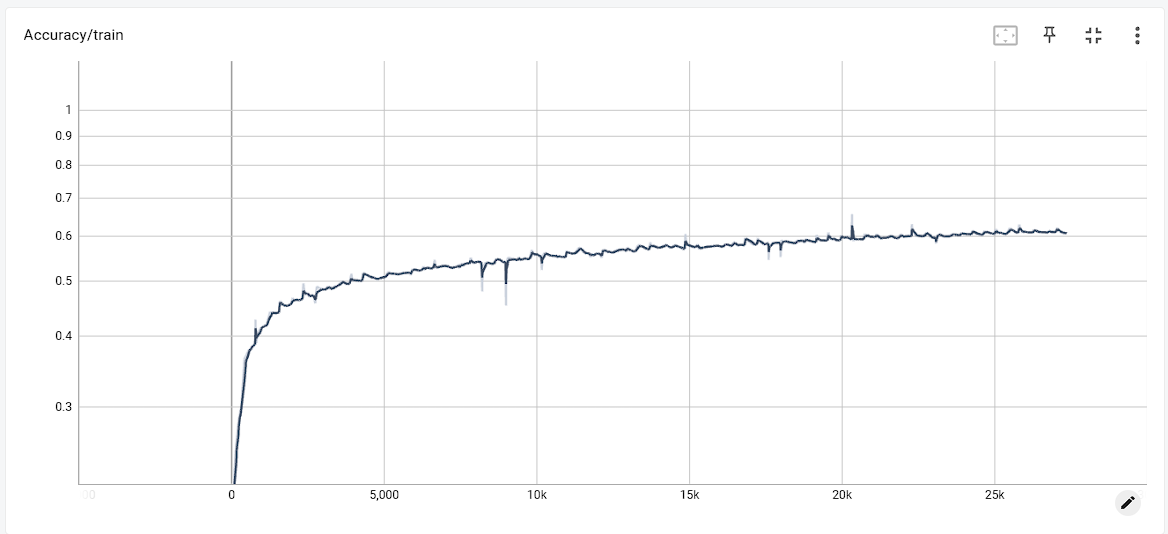

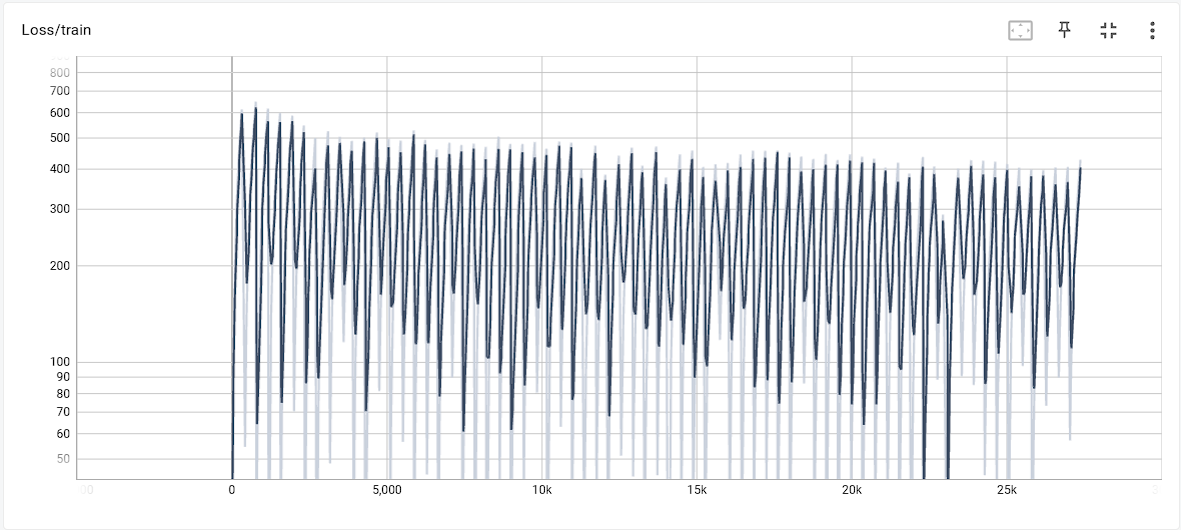

In [10]:
test(model,testloader)

Accuracy on test set: 49.870%


画出混淆矩阵

In [11]:
def plot_confusion_matrix(model, test_loader):
    model.eval()
    true_labels = []
    pred_labels = []
    
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        inputs = torch.flatten(inputs, start_dim=1)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        true_labels.extend(labels.tolist())
        pred_labels.extend(preds.tolist())
    
    cm = confusion_matrix(true_labels, pred_labels)
    print(cm)
    classes = range(10)  # 类别数目
    plt.figure(figsize=(16,10))
    plt.subplot(1,2,1)
    sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.Blues)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()



[[3266  197  353  129  121   49   73   64  538  210]
 [ 173 3758   64   91   23   19   40   38  264  530]
 [ 272   59 3008  390  375  222  397  111   87   79]
 [ 139   49  578 2730  147  609  378  104  138  128]
 [ 191   32 1034  405 2415  182  392  142  153   54]
 [  88   35  603 1555  174 1946  271  125  115   88]
 [  31   60  452  633  240  132 3318   22   62   50]
 [ 177   43  549  376  440  270  111 2791   98  145]
 [ 398  210   75  119   59   40   26   15 3860  198]
 [ 168  628  106  186   36   39   56   77  273 3431]]


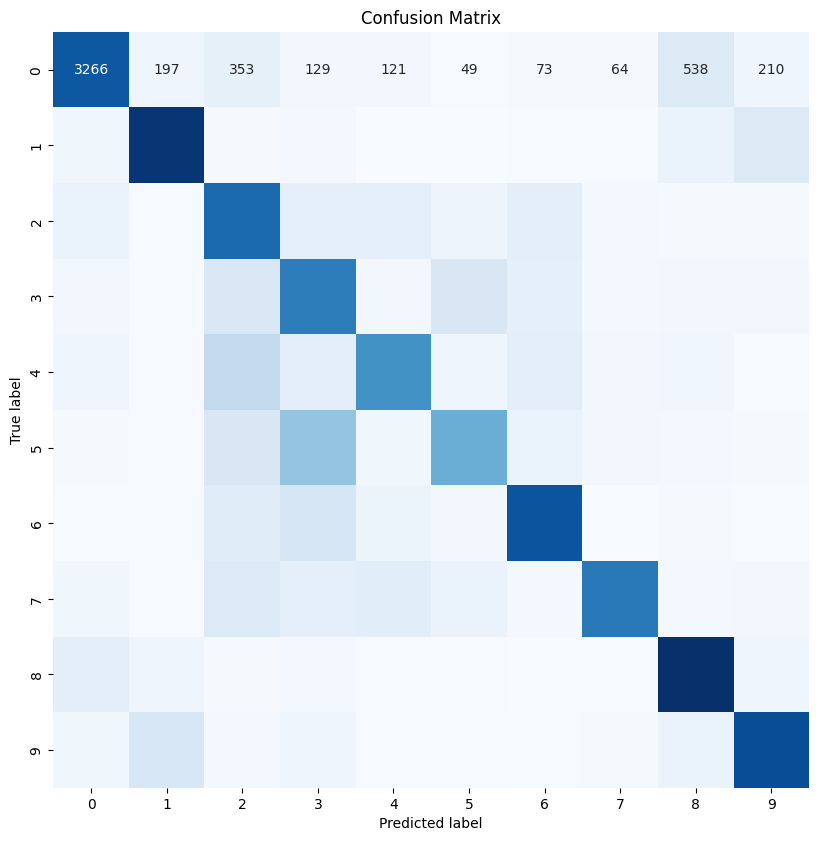

[[570  43  92  29  19  10  26  15 139  57]
 [ 51 614  33  32   5  12  16  18  78 141]
 [ 69  18 475 104  84  66 107  26  27  24]
 [ 24  20 144 404  33 133 126  35  43  38]
 [ 48  16 210  95 388  48 112  39  32  12]
 [ 29  14 121 301  46 324  68  37  40  20]
 [ 11  15 123 137  93  44 531   8  22  16]
 [ 38  14 128 104  94  75  40 436  20  51]
 [ 96  53  31  30  12  12  11   7 693  55]
 [ 37 183  41  46  11  13  23  19  75 552]]


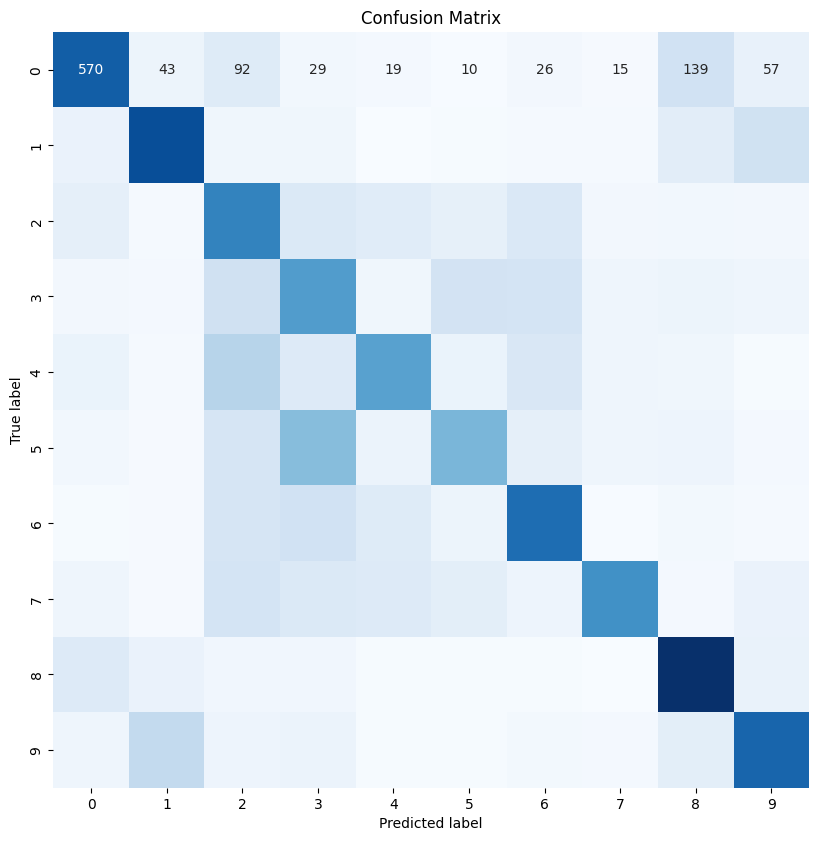

In [12]:
plot_confusion_matrix(model,trainloader)
plot_confusion_matrix(model,testloader)

创建模型的可视化图

In [43]:
from torchsummary import summary
#打印模型
summary(model,(input_size, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         393,344
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 10]             650
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.53
Estimated Total Size (MB): 1.55
----------------------------------------------------------------


下面修改模型参数

增大中间层神经元数为1024

In [15]:
model = MLP(input_size,1024).to(device)
optimizer=torch.optim.Adam(model.parameters())
train(model,trainloader,70,optimizer)

[1/70] loss:1.933.correct:29.690%
[2/70] loss:1.733.correct:37.368%
[3/70] loss:1.646.correct:40.410%
[4/70] loss:1.586.correct:42.782%
[5/70] loss:1.535.correct:44.768%
[6/70] loss:1.503.correct:46.142%
[7/70] loss:1.477.correct:47.250%
[8/70] loss:1.451.correct:48.252%
[9/70] loss:1.432.correct:49.048%
[10/70] loss:1.398.correct:50.034%
[11/70] loss:1.379.correct:51.102%
[12/70] loss:1.354.correct:51.776%
[13/70] loss:1.332.correct:52.698%
[14/70] loss:1.315.correct:53.432%
[15/70] loss:1.294.correct:53.742%
[16/70] loss:1.278.correct:54.424%
[17/70] loss:1.264.correct:54.920%
[18/70] loss:1.247.correct:55.440%
[19/70] loss:1.228.correct:56.354%
[20/70] loss:1.220.correct:56.502%
[21/70] loss:1.198.correct:57.278%
[22/70] loss:1.189.correct:57.632%
[23/70] loss:1.176.correct:58.160%
[24/70] loss:1.158.correct:58.708%
[25/70] loss:1.151.correct:58.904%
[26/70] loss:1.130.correct:59.552%
[27/70] loss:1.118.correct:60.184%
[28/70] loss:1.106.correct:60.568%
[29/70] loss:1.103.correct:60

In [16]:
test(model,testloader)

Accuracy on test set: 52.350%


增加隐藏层的层数

In [19]:
#增加一层神经元后
class MLP2(nn.Module):
    def __init__(self, input_size,hidden_size):
        super(MLP2, self).__init__()
        self.Linear1 = nn.Linear(input_size, hidden_size)
        self.Linear2 = nn.Linear(hidden_size, 256)
        self.Linear3 = nn.Linear(256, 64)
        self.Linear4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.Linear1(x))
        x = self.relu(self.Linear2(x))
        x = self.relu(self.Linear3(x))
        x = self.Linear4(x)
        return x

In [25]:
model = MLP2(input_size,1024).to(device)
optimizer=torch.optim.Adam(model.parameters())
train(model,trainloader,70,optimizer)

[1/70] loss:1.898.correct:30.604%
[2/70] loss:1.716.correct:38.268%
[3/70] loss:1.623.correct:41.946%
[4/70] loss:1.564.correct:44.040%
[5/70] loss:1.526.correct:45.424%
[6/70] loss:1.485.correct:47.026%
[7/70] loss:1.446.correct:48.406%
[8/70] loss:1.423.correct:49.194%
[9/70] loss:1.396.correct:50.036%
[10/70] loss:1.373.correct:50.860%
[11/70] loss:1.351.correct:51.880%
[12/70] loss:1.328.correct:52.464%
[13/70] loss:1.307.correct:53.334%
[14/70] loss:1.288.correct:54.014%
[15/70] loss:1.274.correct:54.490%
[16/70] loss:1.247.correct:55.112%
[17/70] loss:1.235.correct:55.824%
[18/70] loss:1.215.correct:56.540%
[19/70] loss:1.203.correct:56.918%
[20/70] loss:1.184.correct:57.666%
[21/70] loss:1.177.correct:57.806%
[22/70] loss:1.155.correct:58.844%
[23/70] loss:1.146.correct:58.818%
[24/70] loss:1.132.correct:59.148%
[25/70] loss:1.112.correct:60.066%
[26/70] loss:1.092.correct:60.902%
[27/70] loss:1.085.correct:61.202%
[28/70] loss:1.075.correct:61.522%
[29/70] loss:1.061.correct:62

In [26]:
test(model,testloader)

Accuracy on test set: 51.360%


改变激活函数

In [27]:

class MLP3(nn.Module):
    def __init__(self, input_size,hidden_size):
        super(MLP3, self).__init__()
        self.Linear1 = nn.Linear(input_size, hidden_size)
        self.Linear2 = nn.Linear(hidden_size, 64)
        self.Linear3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # 在输出层应用 Softmax

    def forward(self, x):
        x = self.relu(self.Linear1(x))
        x = self.relu(self.Linear2(x))
        x = self.relu(self.Linear3(x))
        x=self.softmax(x)
        return x

In [28]:
model = MLP3(input_size,1024).to(device)
optimizer=torch.optim.Adam(model.parameters())
train(model,trainloader,70,optimizer)

[1/70] loss:2.214.correct:23.238%
[2/70] loss:2.154.correct:29.802%
[3/70] loss:2.136.correct:31.590%
[4/70] loss:2.127.correct:32.562%
[5/70] loss:2.116.correct:33.616%
[6/70] loss:2.108.correct:34.538%
[7/70] loss:2.100.correct:35.426%
[8/70] loss:2.094.correct:36.106%
[9/70] loss:2.090.correct:36.440%
[10/70] loss:2.086.correct:36.750%
[11/70] loss:2.080.correct:37.670%
[12/70] loss:2.073.correct:38.334%
[13/70] loss:2.062.correct:39.430%
[14/70] loss:2.051.correct:40.562%
[15/70] loss:2.044.correct:41.198%
[16/70] loss:2.041.correct:41.604%
[17/70] loss:2.035.correct:42.124%
[18/70] loss:2.028.correct:42.990%
[19/70] loss:2.024.correct:43.324%
[20/70] loss:2.023.correct:43.394%
[21/70] loss:2.021.correct:43.608%
[22/70] loss:2.013.correct:44.426%
[23/70] loss:2.010.correct:44.796%
[24/70] loss:2.009.correct:44.800%
[25/70] loss:2.008.correct:44.892%
[26/70] loss:2.002.correct:45.608%
[27/70] loss:2.000.correct:45.764%
[28/70] loss:1.996.correct:46.078%
[29/70] loss:1.994.correct:46

In [29]:
test(model,testloader)

Accuracy on test set: 44.600%


In [30]:
# 数据归一化和数据增强的转换
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 随机裁剪，模拟数据增强
    transforms.RandomHorizontalFlip(),     # 随机水平翻转，模拟数据增强
    transforms.ToTensor(),                 # 将图像转换为张量
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # 归一化
])

# 加载测试数据集（通常不需要数据增强）
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
cifar10 = torchvision.datasets.CIFAR10(
    root='./data/cifar-10-python/cifar-10-batches-py',
    train=True,
    download=True,
    transform=transform_train
)
cifar10_test=torchvision.datasets.CIFAR10(
    root='./data/cifar-10-python/cifar-10-batches-py',
    train=False,
    download=True,
    transform=transform_test

)
train_dataset=cifar10
test_dataset=cifar10_test


device = torch.device("cuda:0")
logdir = 'log'
batch_size =128

trainloader = data_utils.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,pin_memory=True)
testloader = data_utils.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,pin_memory=True)

# 定义网络结构
input_size = 32 * 32 * 3

class MLP(nn.Module):
    def __init__(self, input_size,hideen_size):
        super(MLP, self).__init__()
        self.Linear1 = nn.Linear(input_size, hideen_size)
        self.Linear2 = nn.Linear(hideen_size, 64)
        self.Linear3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.Linear1(x))
        x = self.relu(self.Linear2(x))
        x = self.Linear3(x)
        return x
    
def train(model,train_loader,epo,optimizer_input):
    writer = SummaryWriter('./log')
    loss_func=nn.CrossEntropyLoss().to(device)
    optimizer=optimizer_input
    epochs=epo
    global_step=0
    
    for epoch in range(epochs):
        sum_loss=0.0
        train_correct=0
        total=0

        for data in train_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            global_step+=1
            inputs=torch.flatten(inputs,start_dim=1)
            outputs=model(inputs)
            optimizer.zero_grad()
            loss=loss_func(outputs,labels)
            loss.backward()
            optimizer.step()
            _,id=torch.max(outputs.data,1)
            sum_loss+=loss.item()
            train_correct+=(id == labels.data).sum().item()
            total += labels.size(0)

            writer.add_scalar('Loss/train', sum_loss, global_step)
            writer.add_scalar('Accuracy/train', train_correct/total, global_step)

        print('[%d/%d] loss:%.3f.correct:%.3f%%'%
              (epoch+1,epochs,sum_loss/len(train_loader),
               100*(train_correct/total)))
    
    model.eval()
    print('Finished Training')
    writer.close()
    torch.save(model.state_dict,'./model/modelpro'+str(100*(train_correct/total))+'.pth')
def test(model,test_loader):
    test_correct = 0.0
    total=0
    for data in test_loader:
        inputs,lables=data
        inputs,lables=inputs.to(device),lables.to(device)
        inputs=torch.flatten(inputs,start_dim=1)
        outputs=model(inputs)
        _,id=torch.max(outputs.data,1)
        test_correct+=(id==lables.data).sum().item()
        total += lables.size(0)
    print(f'Accuracy on test set: {100*(test_correct / total):.3f}%')


Files already downloaded and verified
Files already downloaded and verified


In [31]:
model = MLP(input_size,1024).to(device)
epoch=100
optimizer=torch.optim.Adam(model.parameters())
train(model,trainloader,epoch,optimizer)

[1/100] loss:1.828.correct:33.928%
[2/100] loss:1.649.correct:40.348%
[3/100] loss:1.589.correct:42.808%
[4/100] loss:1.550.correct:44.356%
[5/100] loss:1.516.correct:45.570%
[6/100] loss:1.493.correct:46.492%
[7/100] loss:1.473.correct:47.154%
[8/100] loss:1.462.correct:47.548%
[9/100] loss:1.443.correct:48.396%
[10/100] loss:1.431.correct:48.648%
[11/100] loss:1.423.correct:48.978%
[12/100] loss:1.413.correct:49.236%
[13/100] loss:1.399.correct:49.950%
[14/100] loss:1.390.correct:50.204%
[15/100] loss:1.382.correct:50.444%
[16/100] loss:1.373.correct:50.702%
[17/100] loss:1.366.correct:50.972%
[18/100] loss:1.357.correct:51.292%
[19/100] loss:1.357.correct:51.168%
[20/100] loss:1.349.correct:51.654%
[21/100] loss:1.340.correct:52.140%
[22/100] loss:1.337.correct:52.090%
[23/100] loss:1.335.correct:52.356%
[24/100] loss:1.326.correct:52.666%
[25/100] loss:1.321.correct:52.744%
[26/100] loss:1.314.correct:53.146%
[27/100] loss:1.315.correct:52.800%
[28/100] loss:1.310.correct:53.126%
[

In [32]:
test(model,testloader)

Accuracy on test set: 47.630%
